In [ ]:
# Author Abbas Vora
# email abbasvora23@gmail.com

In [19]:
import pandas as pd
import numpy as np a
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
sns.set_palette(sns.color_palette("hls", 9))

In [3]:
df = pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

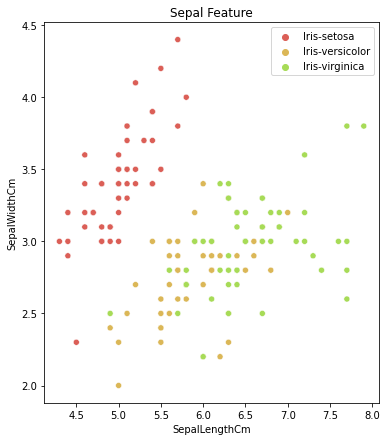

In [8]:
plt.figure(figsize=(6,7))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species')
plt.title("Sepal Feature")
plt.legend()
plt.show()

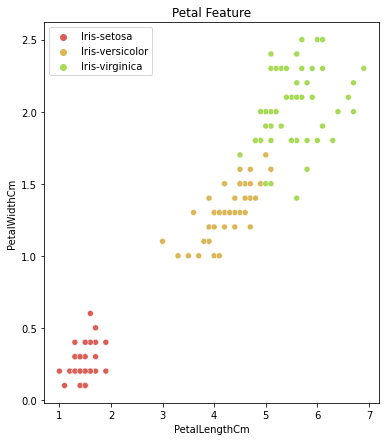

In [9]:
plt.figure(figsize=(6,7))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species')
plt.title("Petal Feature")
plt.legend()
plt.show()

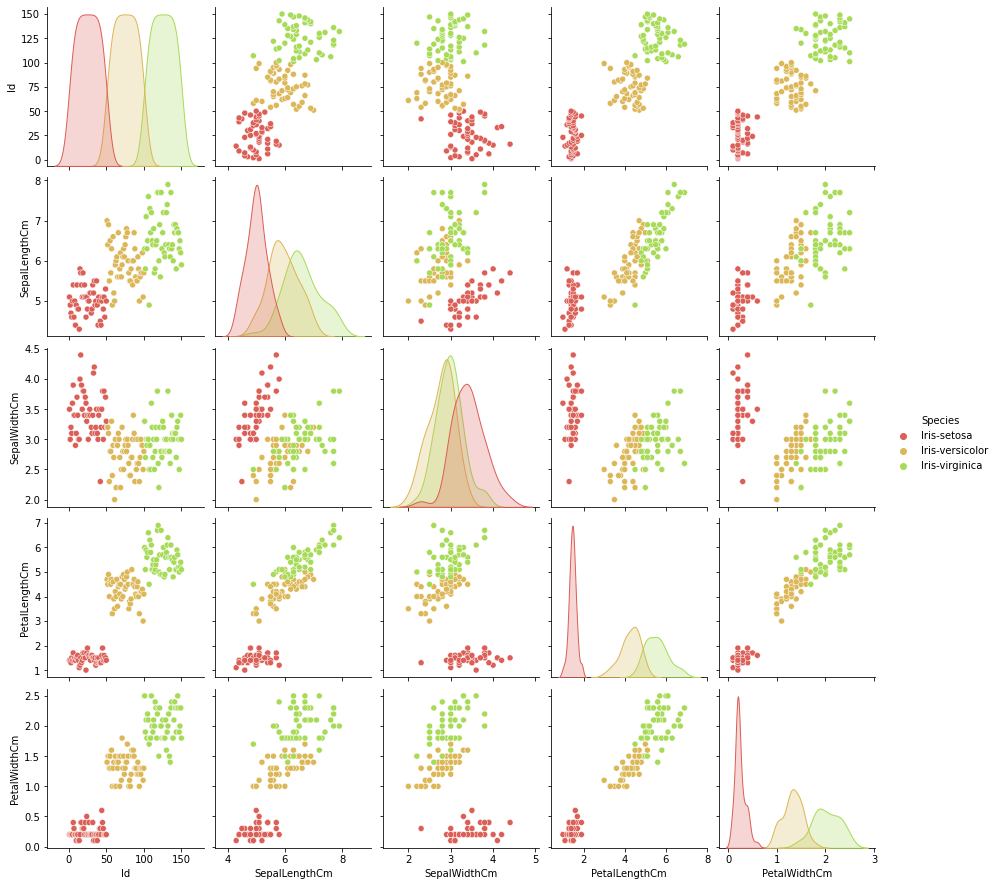

In [10]:
sns.pairplot(df, hue="Species")
plt.show()

# Data Preprocessing

In [7]:
df["Species"] = df["Species"].apply(list(df.Species.unique()).index)

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [11]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# KNN Model

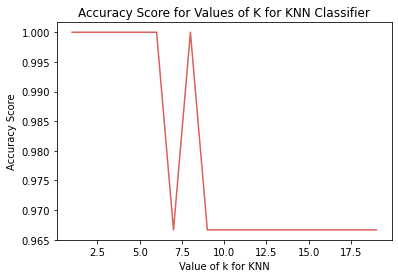

Max Accuracy:  1.0
Values for n_neighbours:  [1, 2, 3, 4, 5, 6, 8]


In [23]:
from sklearn.neighbors import KNeighborsClassifier
k_val = list(range(1, 20))
scores = []

for i in k_val:
    knn = KNeighborsClassifier( n_neighbors=i, metric="euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_val, scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score for Values of K for KNN Classifier")
plt.show()
print("Max Accuracy: ", max(scores))
n_values = [i+1 for i in range(len(scores)) if scores[i] == max(scores)]
print("Values for n_neighbours: ",n_values)

In [49]:
y_pred1 = knn.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.85      0.92        13
           2       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30



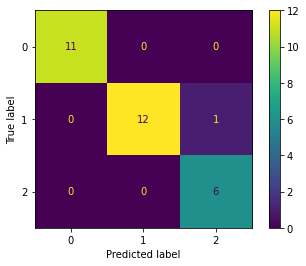

In [24]:
plot_confusion_matrix(knn, X_test, y_test)

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.9666666666666667


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



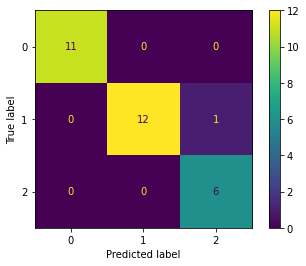

In [21]:
plot_confusion_matrix(tree, X_test, y_test)

# SVC

In [ ]:
from sklearn.svm import SVC